In [2]:
from bayespy import nodes

In [19]:
# Some constatnts we will be using 

n_colors = 5 #Number of colors in each bag
n_bags = 3 # Number of bags
n_trials = 10

# Using Mixture Mdoel or Gates

In [20]:
from bayespy import nodes
import numpy as np


beta = 1e-1 * np.ones(n_colors)
#Generate some random distributions for the color distribution inside each bags
p_color = nodes.Dirichlet(beta,
                          plates = (n_bags,)).random()

#The marbles drawn based on the distribution for 10 trials
# Using same p_color distribution as in the above example
draw_marbles = nodes.Categorical(p_color,
                                 plates=(n_trials, n_bags)).random()
len(draw_marbles)

10

In [39]:

tuple_data1 = np.column_stack((0 * np.ones(len(draw_marbles)), draw_marbles[:,0]))
tuple_data2 = np.column_stack((1 * np.ones(len(draw_marbles)), draw_marbles[:,1]))
tuple_data3 = np.column_stack((2 * np.ones(len(draw_marbles)), draw_marbles[:,2]))
tuple_data = np.row_stack((tuple_data1, tuple_data2, tuple_data3))
tuple_data_reduced = np.row_stack((tuple_data1, tuple_data2, tuple_data3[:3,:]))
tuple_data_reduced.shape

(23, 2)

In [41]:
n_trials_stacked = n_trials * n_bags
p_theta = nodes.Dirichlet(np.ones(n_colors),
                          plates=(n_bags,),
                          name='p_theta')
bags = tuple_data[:,0].reshape((n_trials_stacked,1)).astype(int)
#bags = tuple_data_reduced[:,0].reshape((23,1)).astype(int)
Y = nodes.Mixture(bags, nodes.Categorical, p_theta)


In [42]:
#Y.observe(tuple_data[:,1].reshape(n_trials_stacked,1).astype(int))
Y.observe(tuple_data_reduced[:,1].reshape(23,1).astype(int))


In [43]:
from bayespy.inference import VB
Q = VB(Y, p_theta)
Q.update(repeat=1000)

Iteration 1: loglike=-2.348211e+01 (0.010 seconds)
Iteration 2: loglike=-2.348211e+01 (0.000 seconds)
Converged at iteration 2.


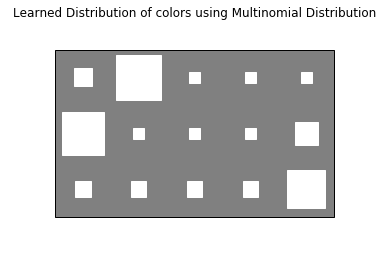

In [44]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p_theta)
bpplt.pyplot.title("Learned Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

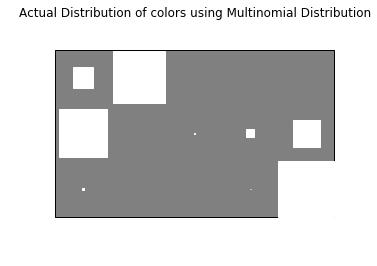

In [31]:
%matplotlib inline
import bayespy.plot as bpplt
#bpplt.pdf(p_theta.pdf, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.hinton(p_color)
bpplt.pyplot.title("Actual Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

In [78]:
from bayespy import nodes
import numpy as np

mu = nodes.Dirichlet([1])

p_theta = nodes.Dirichlet(np.ones(n_colors),
                          plates=(n_bags,),
                          name='p_theta')



bag1_model = nodes.Categorical(p_theta[0],
                        plates=(n_trials, 1),
                        name='bag_model_1')

bag2_model = nodes.Categorical(p_theta[1],
                        plates=(n_trials, 1),
                        name='bag_model_2')

bag3_model = nodes.Categorical(p_theta[2],
                        plates=(n_trials, 1),
                        name='bag_model_3')

bag1_model.plates

(10, 1)

In [65]:
from bayespy import nodes
import numpy as np


beta = 1e-1 * np.ones(n_colors)
#Generate some random distributions for the color distribution inside each bags
p_color = nodes.Dirichlet(beta,
                          plates = (n_bags,)).random()

#The marbles drawn based on the distribution for 10 trials
# Using same p_color distribution as in the above example
draw_marbles = nodes.Categorical(p_color,
                                 plates=(n_trials, n_bags)).random()
draw_marbles

array([[0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0],
       [0, 2, 0]])

In [66]:
bag1_model.observe(draw_marbles[:,0].reshape((10,1)))
bag2_model.observe(draw_marbles[:,1].reshape((10,1)))
bag3_model.observe(draw_marbles[:,2].reshape((10,1)))


In [67]:
bag3_model.unobserve()

In [68]:
from bayespy.inference import VB
Q = VB(bag1_model, bag2_model, bag3_model, p_theta)
Q.update(repeat=1000)

Iteration 1: loglike=-1.381751e+01 (0.010 seconds)
Iteration 2: loglike=-1.381751e+01 (0.000 seconds)
Converged at iteration 2.


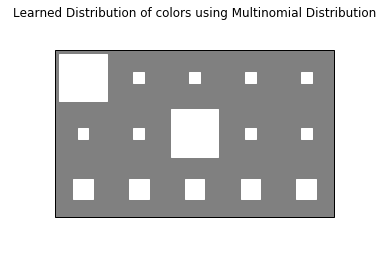

In [69]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p_theta)
bpplt.pyplot.title("Learned Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

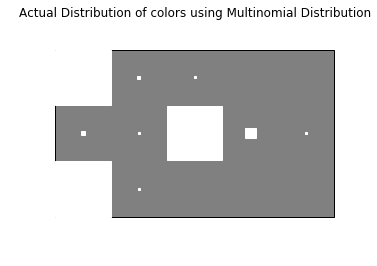

In [70]:
%matplotlib inline
import bayespy.plot as bpplt
#bpplt.pdf(p_theta.pdf, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.hinton(p_color)
bpplt.pyplot.title("Actual Distribution of colors using Multinomial Distribution")
bpplt.pyplot.show()

In [45]:
mu = nodes.Dirichlet([1])

p_theta = nodes.Dirichlet([mu],
                          plates=(n_bags,),
                          name='p_theta')

TypeError: unorderable types: Dirichlet() < int()